In [1]:
# === PARTIE 1 : IMPORT ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

# Pour utiliser notre fichier utils
sys.path.append('../utils')
from utils import generate_random_sales

print("✅ Toutes les librairies sont importées")

✅ Toutes les librairies sont importées


In [2]:
# === PARTIE 2 : CRÉER LES DONNÉES ===
print("\n=== CRÉATION DES DONNÉES ===")

# Créer les dates de l'année 2025
dates = pd.date_range(start='2025-01-01', periods=12, freq='M')

# Générer les ventes pour chaque produit
product_a = generate_random_sales(50, 100, 12)
product_b = generate_random_sales(30, 80, 12)
product_c = generate_random_sales(20, 60, 12)
product_d = generate_random_sales(10, 50, 12)

# Faire un tableau avec pandas
df = pd.DataFrame({
    'Date': dates,
    'Product_A': product_a,
    'Product_B': product_b,
    'Product_C': product_c,
    'Product_D': product_d
})

# Sauvegarder les données initiales
df.to_csv('../data/initial.csv', index=False)
print("✅ Fichier initial.csv créé")
print(df.head())



=== CRÉATION DES DONNÉES ===
✅ Fichier initial.csv créé
        Date  Product_A  Product_B  Product_C  Product_D
0 2025-01-31         81         52         51         41
1 2025-02-28         71         30         20         22
2 2025-03-31         57         37         33         14
3 2025-04-30         63         76         35         16
4 2025-05-31         95         68         56         11


/tmp/ipykernel_7194/697922257.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2025-01-01', periods=12, freq='M')


In [3]:
# === PARTIE 3 : AJOUTER DES CALCULS ===
print("\n=== CALCULS SUPPLEMENTAIRES ===")

# Copier le tableau pour ne pas perdre les données originales
df_final = df.copy()

# 1. Total des ventes par mois
df_final['Total_Sales'] = df_final['Product_A'] + df_final['Product_B'] + df_final['Product_C'] + df_final['Product_D']

# 2. Moyenne des ventes par mois
df_final['Average_Sales'] = df_final['Total_Sales'] / 4

# 3. Croissance mois par mois (un peu plus compliqué)
df_final['Month_over_Month_Growth'] = df_final['Total_Sales'].pct_change() * 100

# 4. Ajouter les trimestres
def trouver_trimestre(mois):
    if mois <= 3:
        return 'Q1'
    elif mois <= 6:
        return 'Q2'
    elif mois <= 9:
        return 'Q3'
    else:
        return 'Q4'

df_final['Month_Number'] = df_final['Date'].dt.month
df_final['Quarter'] = df_final['Month_Number'].apply(trouver_trimestre)

# 5. Produit avec le plus de ventes chaque mois
products = ['Product_A', 'Product_B', 'Product_C', 'Product_D']
df_final['Max_Sales_Product'] = df_final[products].idxmax(axis=1)
df_final['Min_Sales_Product'] = df_final[products].idxmin(axis=1)

# Sauvegarder le tableau complet
df_final.to_csv('../data/final.csv', index=False)
print("✅ Fichier final.csv créé")
print(df_final.head())



=== CALCULS SUPPLEMENTAIRES ===
✅ Fichier final.csv créé
        Date  Product_A  Product_B  Product_C  Product_D  Total_Sales  \
0 2025-01-31         81         52         51         41          225   
1 2025-02-28         71         30         20         22          143   
2 2025-03-31         57         37         33         14          141   
3 2025-04-30         63         76         35         16          190   
4 2025-05-31         95         68         56         11          230   

   Average_Sales  Month_over_Month_Growth  Month_Number Quarter  \
0          56.25                      NaN             1      Q1   
1          35.75               -36.444444             2      Q1   
2          35.25                -1.398601             3      Q1   
3          47.50                34.751773             4      Q2   
4          57.50                21.052632             5      Q2   

  Max_Sales_Product Min_Sales_Product  
0         Product_A         Product_D  
1         Product_A 

In [4]:
# === PARTIE 4 : RÉSUMÉS PAR TRIMESTRE ===
print("\n=== ANALYSE PAR TRIMESTRE ===")

# Moyenne par trimestre
pivot_moyenne = df_final.groupby('Quarter')[products].mean().round(2)
print("Moyenne des ventes par trimestre:")
print(pivot_moyenne)

# Total par trimestre
pivot_total = df_final.groupby('Quarter')['Total_Sales'].sum()
print("\nTotal des ventes par trimestre:")
print(pivot_total)

# Sauvegarder les résultats
with open('../data/output.csv', 'w') as f:
    f.write("MOYENNES PAR TRIMESTRE\n")
    pivot_moyenne.to_csv(f)
    f.write("\nTOTAUX PAR TRIMESTRE\n")
    pivot_total.to_csv(f, header=True)

print("✅ Fichier output.csv créé")



=== ANALYSE PAR TRIMESTRE ===
Moyenne des ventes par trimestre:
         Product_A  Product_B  Product_C  Product_D
Quarter                                            
Q1           69.67      39.67      34.67      25.67
Q2           70.67      59.00      44.67      19.00
Q3           92.67      46.67      35.33      21.33
Q4           63.67      57.00      30.00      27.33

Total des ventes par trimestre:
Quarter
Q1    509
Q2    580
Q3    588
Q4    534
Name: Total_Sales, dtype: int64
✅ Fichier output.csv créé


In [5]:
# === PARTIE 5 : TROUVER LES MEILLEURS ===
print("\n=== LES MEILLEURS PERFORMANCES ===")

# Meilleur mois
meilleur_mois = df_final.loc[df_final['Total_Sales'].idxmax()]
print(f"🎉 MEILLEUR MOIS: {meilleur_mois['Date'].strftime('%B %Y')}")
print(f"   Ventes: {meilleur_mois['Total_Sales']}")

# Meilleur produit
ventes_totales = {
    'Product_A': df_final['Product_A'].sum(),
    'Product_B': df_final['Product_B'].sum(),
    'Product_C': df_final['Product_C'].sum(),
    'Product_D': df_final['Product_D'].sum()
}

meilleur_produit = max(ventes_totales, key=ventes_totales.get)
print(f"🏆 MEILLEUR PRODUIT: {meilleur_produit}")
print(f"   Ventes annuelles: {ventes_totales[meilleur_produit]}")

# Meilleur trimestre
meilleur_trimestre = pivot_total.idxmax()
print(f"⭐ MEILLEUR TRIMESTRE: {meilleur_trimestre}")
print(f"   Ventes: {pivot_total[meilleur_trimestre]}")




=== LES MEILLEURS PERFORMANCES ===
🎉 MEILLEUR MOIS: May 2025
   Ventes: 230
🏆 MEILLEUR PRODUIT: Product_A
   Ventes annuelles: 890
⭐ MEILLEUR TRIMESTRE: Q3
   Ventes: 588



=== CRÉATION DES GRAPHIQUES ===


/tmp/ipykernel_7194/2431373423.py:45: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(donnees_boxplot, labels=products)


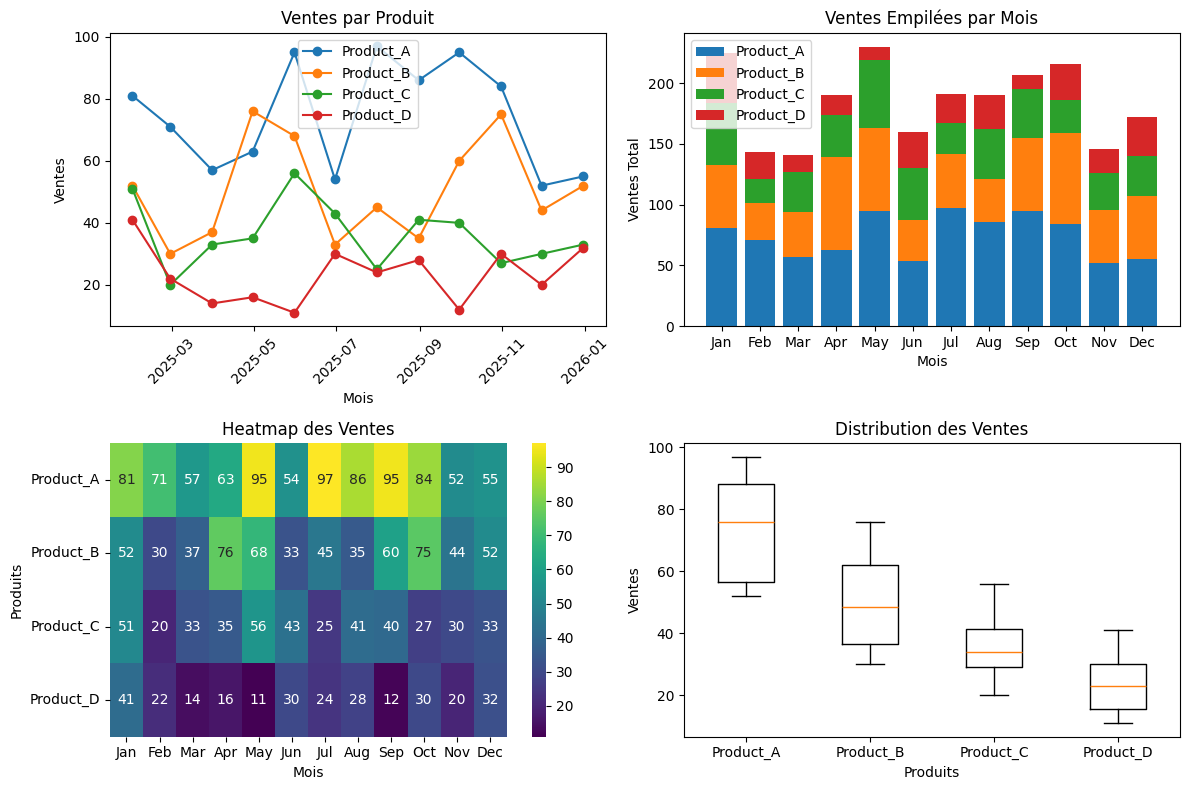

✅ Graphiques créés et sauvegardés


In [6]:
# === PARTIE 6 : GRAPHIQUES SIMPLES ===
print("\n=== CRÉATION DES GRAPHIQUES ===")

# Graphique 1 : Évolution des ventes
plt.figure(figsize=(12, 8))

# Sous-graphique 1 : Ligne
plt.subplot(2, 2, 1)
for product in products:
    plt.plot(df_final['Date'], df_final[product], marker='o', label=product)
plt.title('Ventes par Produit')
plt.xlabel('Mois')
plt.ylabel('Ventes')
plt.legend()
plt.xticks(rotation=45)

# Sous-graphique 2 : Barres empilées
plt.subplot(2, 2, 2)
mois_noms = df_final['Date'].dt.strftime('%b')
largeur = 0.8
bas = np.zeros(12)

for product in products:
    plt.bar(mois_noms, df_final[product], largeur, label=product, bottom=bas)
    bas += df_final[product].values

plt.title('Ventes Empilées par Mois')
plt.xlabel('Mois')
plt.ylabel('Ventes Total')
plt.legend()

# Sous-graphique 3 : Heatmap
plt.subplot(2, 2, 3)
donnees_heatmap = df_final[products].T
donnees_heatmap.columns = mois_noms
sns.heatmap(donnees_heatmap, annot=True, fmt='d', cmap='viridis')
plt.title('Heatmap des Ventes')
plt.xlabel('Mois')
plt.ylabel('Produits')

# Sous-graphique 4 : Boxplot
plt.subplot(2, 2, 4)
donnees_boxplot = [df_final['Product_A'], df_final['Product_B'], 
                   df_final['Product_C'], df_final['Product_D']]
plt.boxplot(donnees_boxplot, labels=products)
plt.title('Distribution des Ventes')
plt.xlabel('Produits')
plt.ylabel('Ventes')

plt.tight_layout()
plt.savefig('../data/graphiques_ventes.png', dpi=150)
plt.show()

print("✅ Graphiques créés et sauvegardés")

In [8]:
# === PARTIE 7 : CONCLUSIONS ===
print("\n" + "="*50)
print("📊 RÉSULTATS FINAUX")
print("="*50)

print(f"1. Produit le plus important: {meilleur_produit}")
print(f"2. Trimestre le plus fort: {meilleur_trimestre}")
print(f"3. Mois record: {meilleur_mois['Date'].strftime('%B')}")



📊 RÉSULTATS FINAUX
1. Produit le plus important: Product_A
2. Trimestre le plus fort: Q3
3. Mois record: May
